
# Project: Analyzing No show appointments Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Description**: This dataset is collected from 100k medical appointments in
Brazil and is focusing on whether patients show up
for their appointment or not.

Questions we are trying to answer:

1 - What is the overall rate of appointment show-up vs no show-up?

2 - What are the most feature that effects the show-up?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **1- Loading Data**

In [2]:
df = pd.read_csv('noshow_2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


> **2- Exploring Data**

In [3]:
print('Columns number : {}'.format(df.shape[1]))
print('Rows number : {}'.format(df.shape[0]))
print('Is there is any null values? ',df.isnull().sum().any())
print('Number of duplicated rows is : ',df.duplicated().sum())

Columns number : 14
Rows number : 110527
Is there is any null values?  False
Number of duplicated rows is :  0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### Data Cleaning 
####  1- Removing coulmns that will not be used.

In [6]:
df.drop(['PatientId', 'AppointmentID', 'ScheduledDay','AppointmentDay'],axis=1,inplace=True)
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### 2- Renaming coulmns.

In [7]:
df.rename(columns={'No-show':'No_show', 'Hipertension':'Hypertension', 'Handcap': 'Handicap'}, inplace=True)
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### 3- Converting 'No_show' column from string to int (0 = 'No' and 1 = 'Yes')

In [8]:
df.No_show.replace(('Yes', 'No'), (1, 0), inplace=True)
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,0


####    4- Fixing illogical age data (values must be > 0)

In [9]:
df[df['Age'] <= 0]= int(df['Age'].mean())
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,0


####    5- Deleting error records (with 37 values)

In [10]:
df.drop(df[df['Gender'] == 37].index ,inplace=True)
print(df['Gender'].value_counts())
print(df.shape)
df.head()

F    70118
M    36869
Name: Gender, dtype: int64
(106987, 10)


,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,0


#### 6-General investigating and visualizing columns

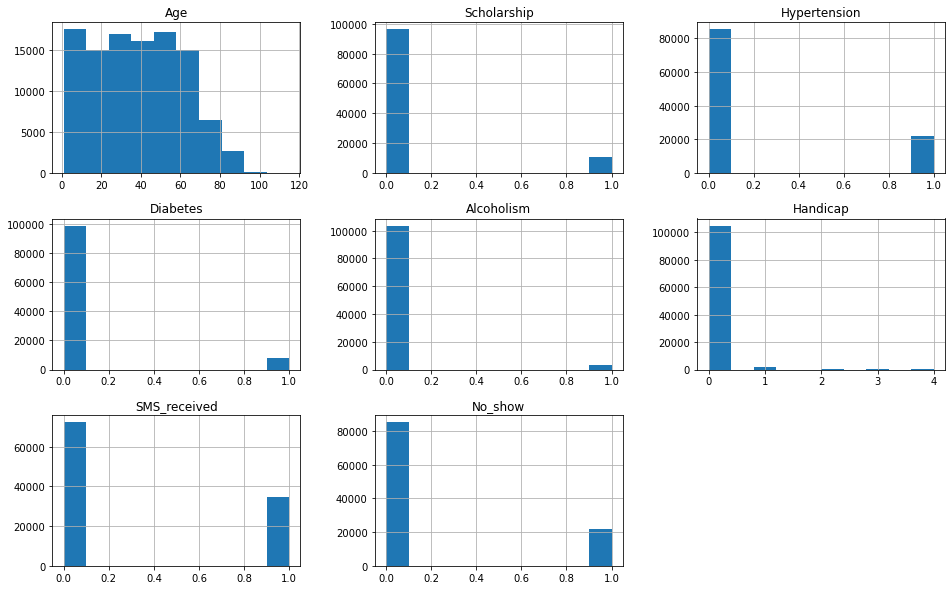

In [11]:
df.hist(figsize=(16,10));

<a id='eda'></a>
## Exploratory Data Analysis
### Research Question 1 (what is the overall appointment show-up vs. no show-up rate?)

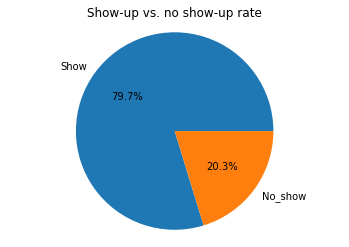

In [12]:
pie_data = df.groupby('No_show').count().Age
plt.pie(pie_data, labels=['Show','No_show'], autopct='%1.1f%%')
plt.title('Show-up vs. no show-up rate')
plt.axis('equal')
plt.show()

#### 20.3% of patients didn't come to their medical appointment

### Research Question 2  (The most feature that effects the show-up)

#### 1- Relation between No_show and Age

In [13]:
df_show = df.No_show == 0
df_no_show = df.No_show == 1

print('Mean age of show at appointment patiants = ',df.Age[df_show].mean())
print('Mean age of no show at appointment patiants = ',df.Age[df_no_show].mean())

Mean age of show at appointment patiants =  39.07518726482
Mean age of no show at appointment patiants =  35.329151291512915


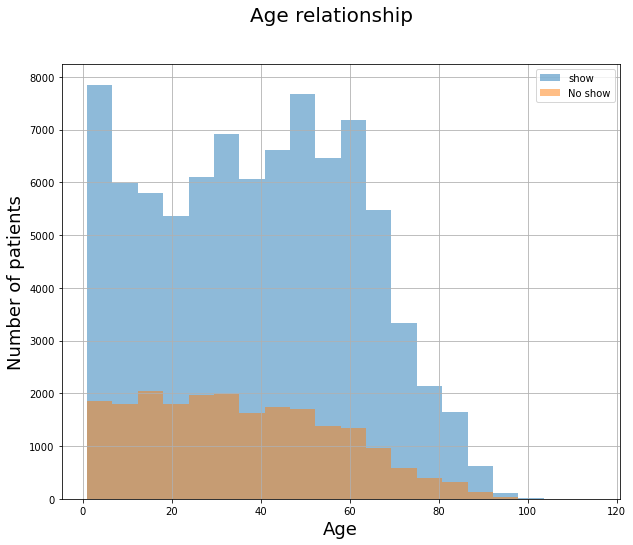

In [14]:
df.Age[df_show].hist(figsize=(10,8),bins = 20, alpha = .5 , label = 'show')
df.Age[df_no_show].hist(bins = 20, alpha = .5 , label = 'No show')
plt.suptitle('Age relationship', fontsize=20)
plt.legend()
plt.xlabel('Age', fontsize= 18)
plt.ylabel('Number of patients', fontsize= 18);

    Age is a significant factor

#### 2- Relation between No_show and Scholarship

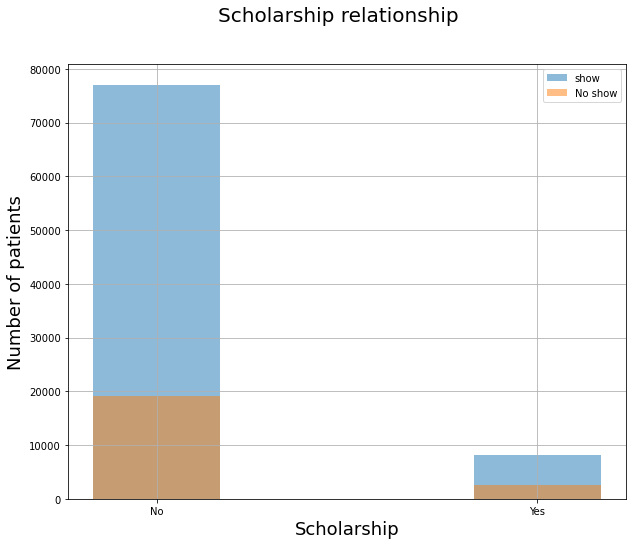

In [15]:
df.Scholarship[df_show].hist(figsize=(10,8),bins = 4, alpha = .5 , label = 'show').set_xticks([.125,.875])
df.Scholarship[df_no_show].hist(bins = 4, alpha = .5 , label = 'No show').set_xticklabels(['No', 'Yes'])
plt.suptitle('Scholarship relationship', fontsize=20)
plt.legend();
plt.xlabel('Scholarship', fontsize= 18)
plt.ylabel('Number of patients', fontsize= 18);

    Scholarship is an insignificant factor

#### 3- Relation between No_show and Neighbourhood

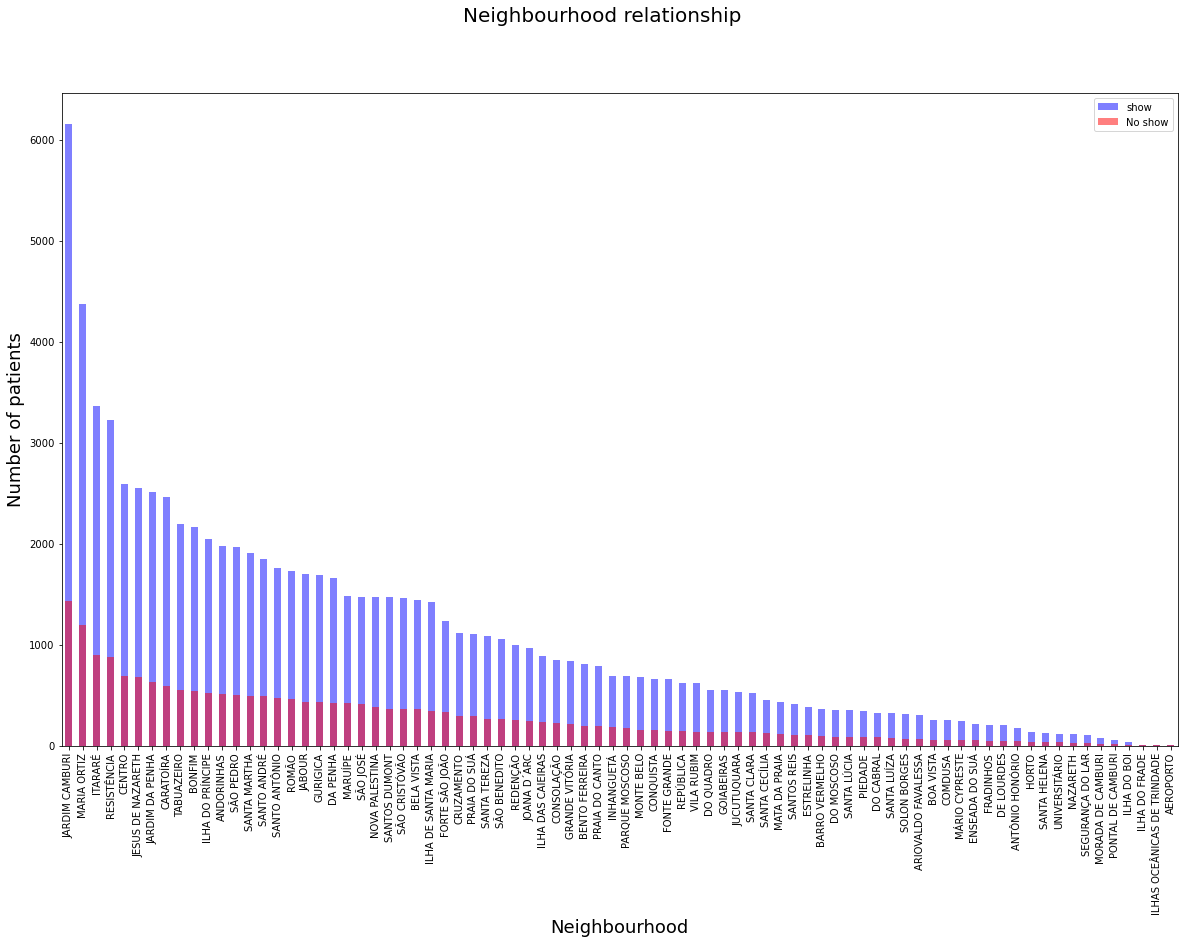

In [16]:
df.Neighbourhood[df_show].value_counts().plot(kind = 'bar',figsize=(20,12),alpha = .5 , label = 'show', color='blue')
df.Neighbourhood[df_no_show].value_counts().plot(kind = 'bar', alpha = .5 , label = 'No show', color='red')
plt.suptitle('Neighbourhood relationship', fontsize=20)
plt.legend()
plt.xlabel('Neighbourhood', fontsize= 18)
plt.ylabel('Number of patients', fontsize= 18);

    Neighbourhood is a significant factor

#### 4- Relation between No_show and Gender

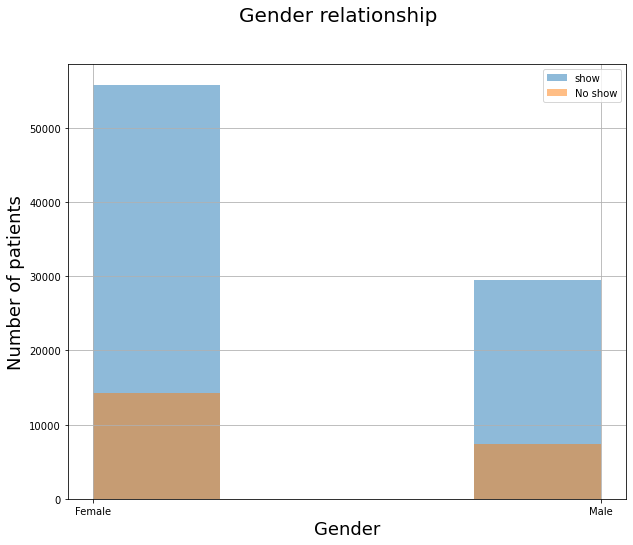

In [17]:
df.Gender[df_show].hist(figsize=(10,8),bins = 4, alpha = .5 , label = 'show').set_xticks(['F','M'])
df.Gender[df_no_show].hist(bins = 4, alpha = .5 , label = 'No show').set_xticklabels(['Female', 'Male'])
plt.suptitle('Gender relationship', fontsize=20)
plt.legend()
plt.xlabel('Gender', fontsize= 18)
plt.ylabel('Number of patients', fontsize= 18);

    Gender is an insignificant factor

#### 5- Relation between No_show and Hypertension

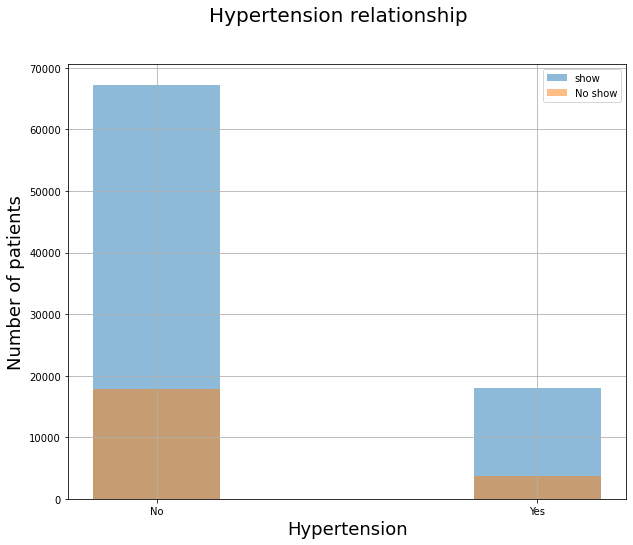

In [18]:
df.Hypertension[df_show].hist(figsize=(10,8),bins = 4, alpha = .5 , label = 'show').set_xticks([.125,.875])
df.Hypertension[df_no_show].hist(bins = 4, alpha = .5 , label = 'No show').set_xticklabels(['No', 'Yes'])
plt.suptitle('Hypertension relationship', fontsize=20)
plt.legend();
plt.xlabel('Hypertension', fontsize= 18)
plt.ylabel('Number of patients', fontsize= 18);

    Hypertension is an insignificant factor

#### 6- Relation between No_show and Diabetes

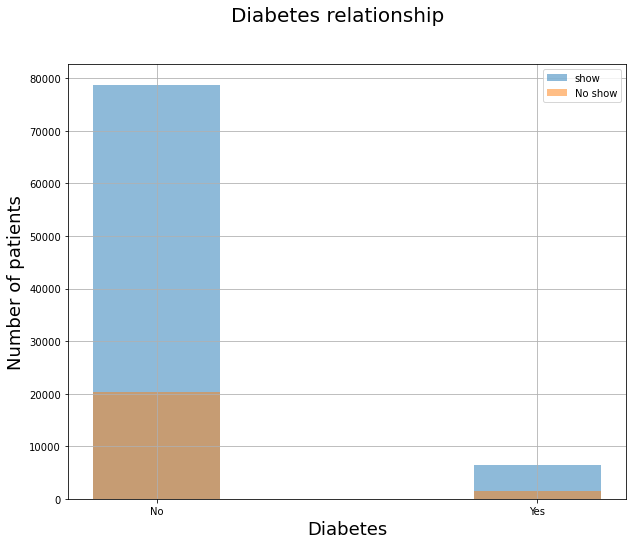

In [19]:
df.Diabetes[df_show].hist(figsize=(10,8),bins = 4, alpha = .5 , label = 'show').set_xticks([.125,.875])
df.Diabetes[df_no_show].hist(bins = 4, alpha = .5 , label = 'No show').set_xticklabels(['No', 'Yes'])
plt.suptitle('Diabetes relationship', fontsize=20)
plt.legend();
plt.xlabel('Diabetes', fontsize= 18)
plt.ylabel('Number of patients', fontsize= 18);

    Diabetes is an insignificant factor

#### 7- Relation between No_show and Alcoholism


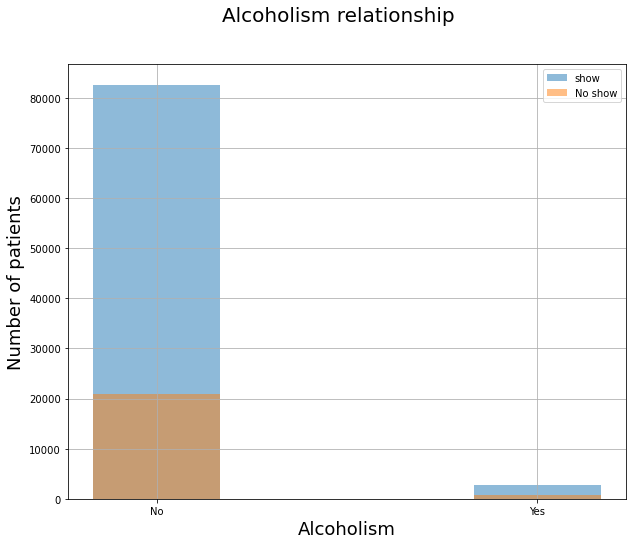

In [20]:
df.Alcoholism[df_show].hist(figsize=(10,8),bins = 4, alpha = .5 , label = 'show').set_xticks([.125,.875])
df.Alcoholism[df_no_show].hist(bins = 4, alpha = .5 , label = 'No show').set_xticklabels(['No', 'Yes'])
plt.suptitle('Alcoholism relationship', fontsize=20)
plt.legend();
plt.xlabel('Alcoholism', fontsize= 18)
plt.ylabel('Number of patients', fontsize= 18);

    Alcoholism is an insignificant factor

#### 8- Relation between No_show and Handicap


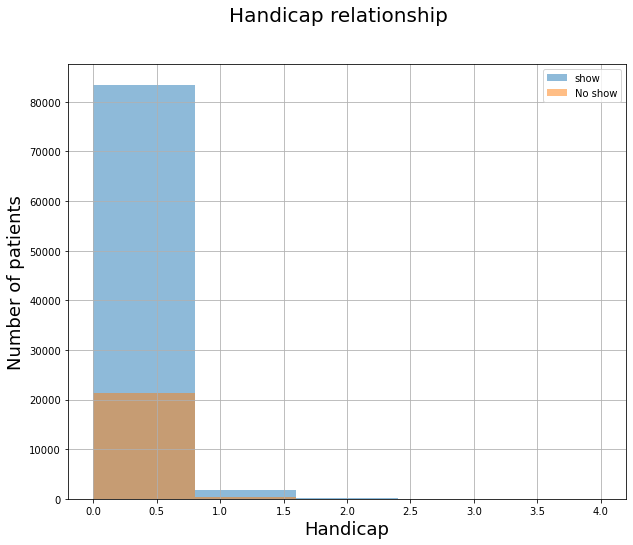

In [21]:
df.Handicap[df_show].hist(figsize=(10,8),bins = 5, alpha = .5 , label = 'show')
df.Handicap[df_no_show].hist(bins = 5, alpha = .5 , label = 'No show')
plt.suptitle('Handicap relationship', fontsize=20)
plt.legend();
plt.xlabel('Handicap', fontsize= 18)
plt.ylabel('Number of patients', fontsize= 18);

    Handicap is an insignificant factor

#### 9- Relation between No_show and SMS_received


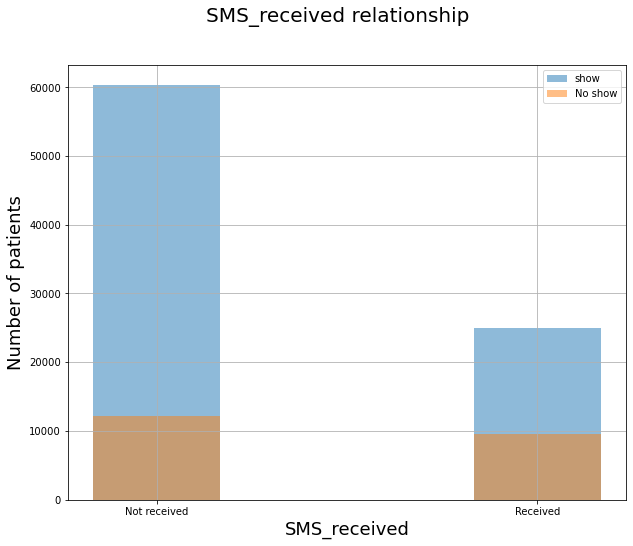

In [22]:
df.SMS_received[df_show].hist(figsize=(10,8),bins = 4, alpha = .5 , label = 'show').set_xticks([.125,.875])
df.SMS_received[df_no_show].hist(bins = 4, alpha = .5 , label = 'No show').set_xticklabels(['Not received', 'Received'])
plt.suptitle('SMS_received relationship', fontsize=20)
plt.legend()
plt.xlabel('SMS_received', fontsize= 18)
plt.ylabel('Number of patients', fontsize= 18);

    SMS_received is an insignificant factor but it is strange that patiants who received sms is much likey not to show.  

<a id='conclusions'></a>
## Conclusions

> **Overall**: Although there is no strong correlation factor that we can rely on from this data set we can choose the most effecting ones 

> **First factor**: In the end, we could say that the main effective factor on no-show is Neighbourhood where there is more Neighbourhood with a high chance of no-show than others.

> **Second factor**: The second affecting factor is Age as patients from 0 to 10 is more likely to show at the appointment more than an older patients

### Limitations

> **First**: Kind of medical specialty would reveal more expectations 

> **Second**: For patients how not showed do they cancel or change their appointment.

